# Group Project - Prediction of User Knowledge 


## Introduction


## Preliminary exploratory data analysis

First, the necessary libraries to analyze our data are read.

In [11]:
library(tidyverse)
library(repr)
library(caret)
library(readxl)

### Reading data into R

The data set is read into R by downloading the file from this [link](https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls).It is then stored in the same folder as this file. The data set is already split into one for training and one for testing. 

In [13]:
training_data_raw <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 2)
head(training_data_raw)

testing_data_raw <- read_excel("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 3)
head(testing_data_raw)

New names:
* `` -> ...7
* `` -> ...8


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.08,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.06,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.10,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.08,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.15,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)


New names:
* `` -> ...7
* `` -> ...8


STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.05,0.05,0.55,0.60,0.14,Low,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.08,0.18,0.63,0.60,0.85,High,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.20,0.20,0.68,0.67,0.85,High,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.22,0.22,0.90,0.30,0.90,High,NA,NA,PEG (The exam performance of user for goal objects)
0.14,0.14,0.70,0.50,0.30,Low,NA,NA,UNS (The knowledge level of user)


It seems that 3 extra columns were read that do not contain data from the data set. Thus, they have been selected out.

In [14]:
training_data <- select(training_data_raw, STG, SCG, STR, LPR, PEG, UNS)
head(training_data)

testing_data <- select(testing_data_raw, STG, SCG, STR, LPR, PEG, UNS)
head(testing_data)

STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.00,0.00,0.00,0.00,very_low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
0.10,0.10,0.15,0.65,0.30,Middle
0.08,0.08,0.08,0.98,0.24,Low
0.09,0.15,0.40,0.10,0.66,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
0.20,0.20,0.68,0.67,0.85,High
0.22,0.22,0.90,0.30,0.90,High
0.14,0.14,0.70,0.50,0.30,Low


Here, we change the classifer to a factor type which is useful for later analysis.

In [15]:
training_data <- training_data %>%
        mutate(UNS = as.factor(UNS))

testing_data <- testing_data %>%
        mutate(UNS = as.factor(UNS))

Then, the data is scaled (Is this necessary?)

In [16]:
training_data_scaled <- training_data %>%
        mutate(scaled_STG = scale(STG, center = TRUE)) %>%
        mutate(scaled_SCG = scale(SCG, center = TRUE)) %>%
        mutate(scaled_STR = scale(STR, center = TRUE)) %>%
        mutate(scaled_LPR = scale(LPR, center = TRUE)) %>%
        mutate(scaled_PEG = scale(PEG, center = TRUE))
head(training_data_scaled)

STG,SCG,STR,LPR,PEG,UNS,scaled_STG,scaled_SCG,scaled_STR,scaled_LPR,scaled_PEG
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
0.00,0.00,0.00,0.00,0.00,very_low,-1.765089,-1.6780077,-1.9029207,-1.7440515,-1.7967053
0.08,0.08,0.10,0.24,0.90,High,-1.384627,-1.3005822,-1.4963171,-0.7767309,1.7297900
0.06,0.06,0.05,0.25,0.33,Low,-1.479743,-1.3949386,-1.6996189,-0.7364259,-0.5036570
0.10,0.10,0.15,0.65,0.30,Middle,-1.289512,-1.2062258,-1.2930153,0.8757751,-0.6212069
0.08,0.08,0.08,0.98,0.24,Low,-1.384627,-1.3005822,-1.5776378,2.2058409,-0.8563066
0.09,0.15,0.40,0.10,0.66,Middle,-1.337070,-0.9703348,-0.2765062,-1.3410013,0.7893912


### Summarizating of Training Data Set

We check to see if there are any missing rows in any of the training data.

In [17]:
anyNA(training_data)

[1] FALSE

None are found! The training data set is complete.

Now, we find the number of observations in each class in training set as well as the mean values of each predictor. (Why is this important?) You will see that the number of observationss vary for the four classes.

In [18]:
number_of_rows_training <- training_data %>%
        group_by(UNS) %>%
        summarize(n = n())
number_of_rows_training

mean_value_training <- training_data %>%
        select(-UNS) %>%
        map_df(mean) %>%
        gather(key = predictor, value = mean_value, everything())
mean_value_training

UNS,n
<fct>,<int>
High,63
Low,83
Middle,88
very_low,24


predictor,mean_value
<chr>,<dbl>
STG,0.3711473
SCG,0.3556744
STR,0.4680039
LPR,0.4327132
PEG,0.4585388


### Visualization of Data

Table showing correlations between predictor variables.

In [19]:
training_data_predictors <- training_data %>%
select(-"UNS")

correlation_table <- cor(training_data_predictors)

correlation_table

,STG,SCG,STR,LPR,PEG
STG,1.00000000,0.08103471,0.04084123,0.09954270,0.2063592
SCG,0.08103471,1.00000000,0.08373209,0.09781558,0.1827923
STR,0.04084123,0.08373209,1.00000000,0.03648104,0.1207791
LPR,0.09954270,0.09781558,0.03648104,1.00000000,-0.2695742
PEG,0.20635924,0.18279233,0.12077914,-0.26957423,1.0000000


Visualization of these correlations

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



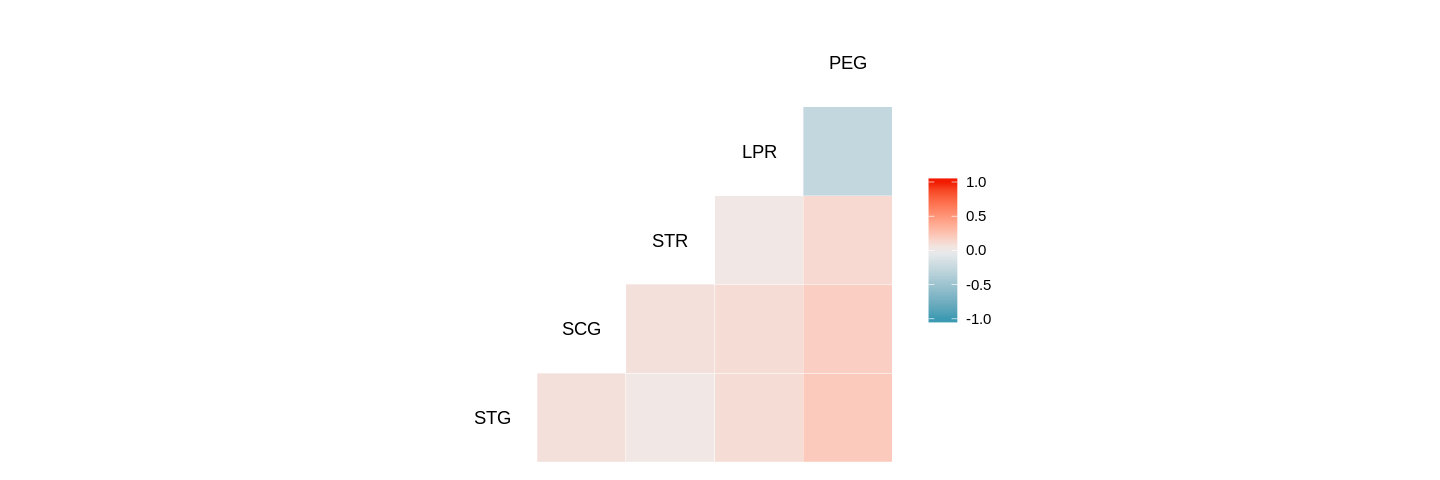

In [20]:
options(repr.plot.height = 4)
library(GGally)
ggcorr(training_data_predictors, method = c("everything", "pearson"))

Shows a lot of different data?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


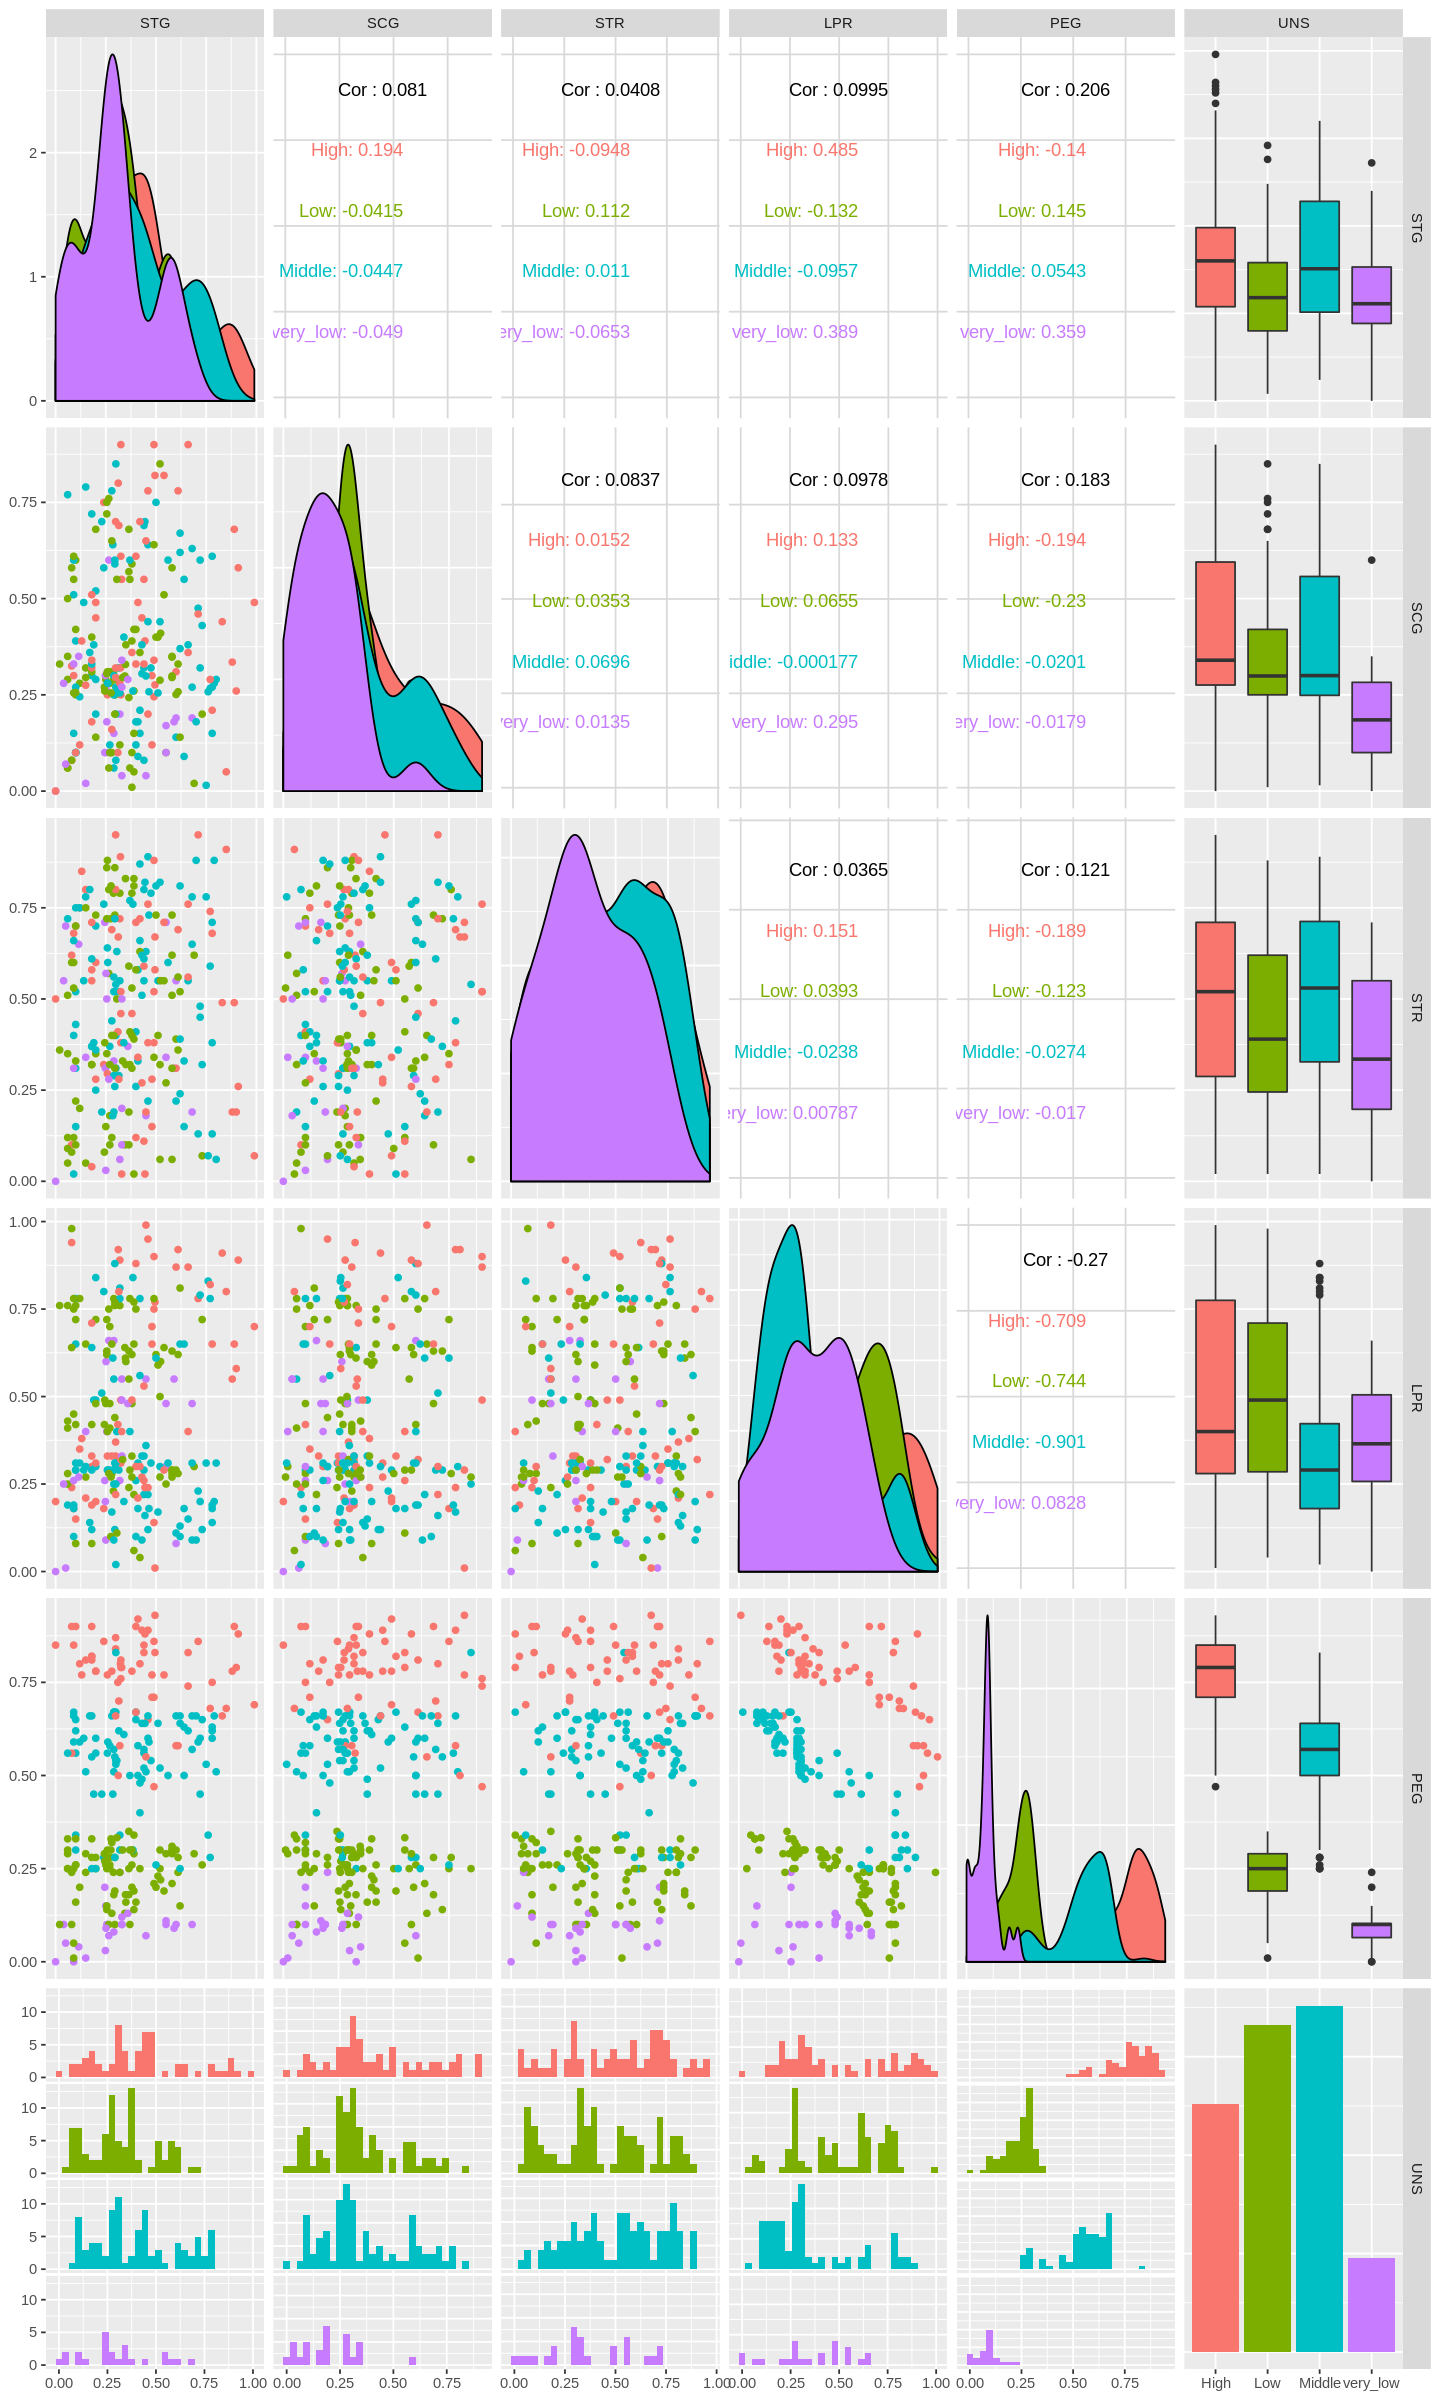

In [27]:
options(repr.plot.height = 20, repr.plot.width = 12)
ggpairs(training_data, columns = 1:6, ggplot2::aes(colour=UNS))

In [30]:
# visualization
# Using only the training set, visualize the data with at least 
# one plot relevant to the analysis you plan to do (this is exploratory data analysis).
# # An example of a useful visualization could be one that compares the distributions of 
# # each of the predictor variables you plan to use in your analysis (ggpairs from the 
# # GGally R package can be helpful here).


# The visualization confirms what the summary table of 
# predictor value means by UNS category suggests: that the 
# distributions of each UNS category are most differentiated in relation to PEG, 
# relative to the other variables.This is evident both in the probability density plots of PEG 
# for each category of UNS as well as the box plots of PEG for each level UNS level. Indeed, 
# the probability density plots of PEG for each UNS category reveals 
# that UNS level High takes standardized PEG values almost exlcusively between 0.4 and 1. 
# In contrast, users in the "very low" UNS category appear to only take PEG levels toward the lower
# end of the distribution, between standardized values of 0.00 to 0.25. 


# Since the distributions of PEG values vary greatly 
# across the UNS levels, PEG is likely be a good predictor of UNS levels and should 
# therefore be included in the model. 

# Two other variables that also show noticeable variation in 
# distributions for different levels of UNS (albeit to a lesser degree) are STG and LPR. 


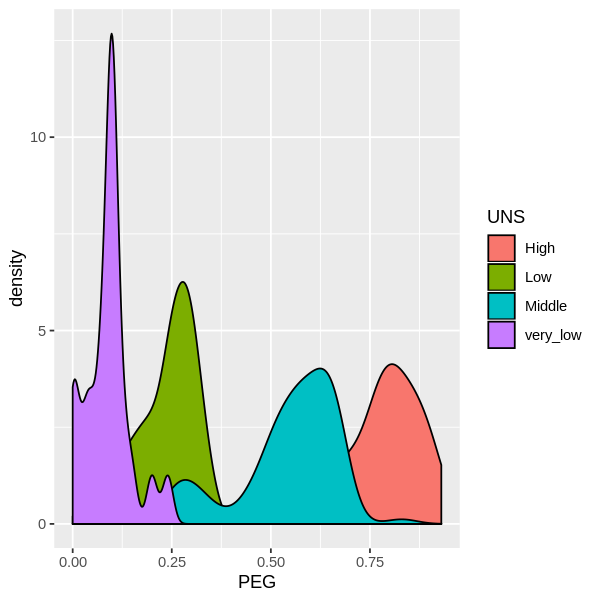

In [55]:
PEG_plot = ggplot(training_data_raw, aes(x = PEG, fill = UNS)) + 
geom_density() + 
labs( x = "PEG", colour = "UNS")

PEG_plot

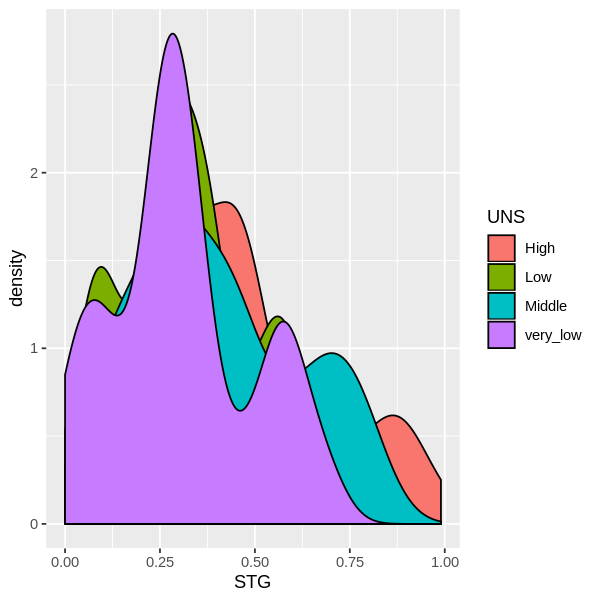

In [54]:
PEG_plot = ggplot(training_data_raw, aes(x = STG, fill = UNS)) + 
geom_density() + 
labs( x = "STG", colour = "UNS")

PEG_plot

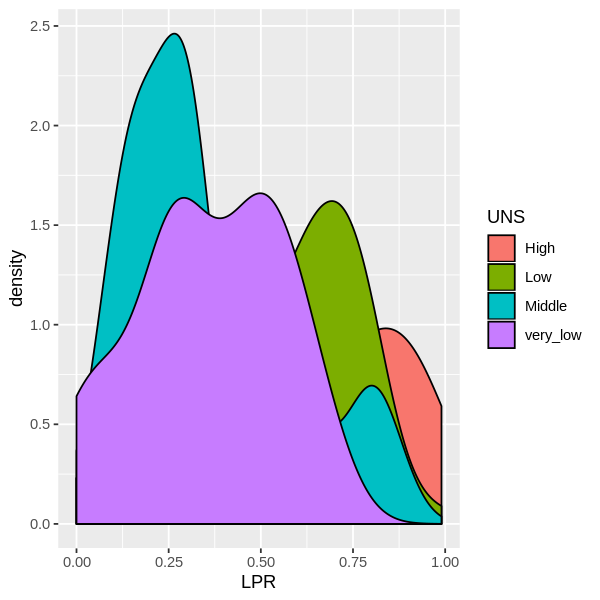

In [52]:
PEG_plot = ggplot(training_data_raw, aes(x = LPR, fill = UNS)) + 
geom_density() + 
labs( x = "LPR", colour = "UNS") 

PEG_plot

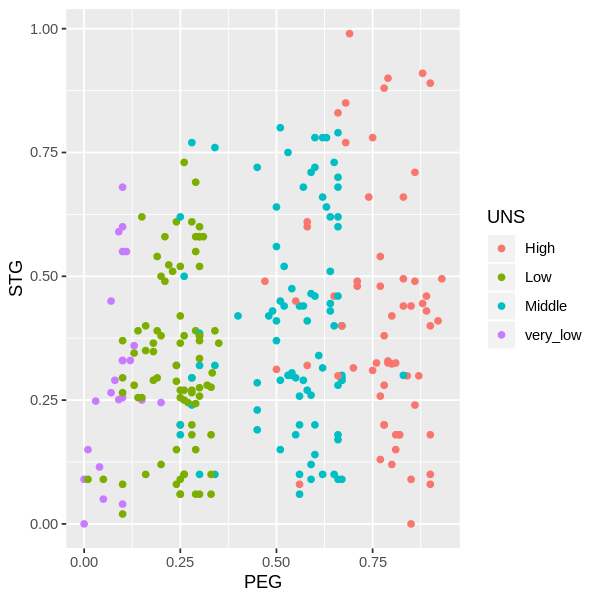

In [39]:
options(repr.plot.height = 5, repr.plot.width = 5)
ggplot(training_data_raw, aes(x = PEG, y = STG, colour = UNS)) +
geom_point()

## Methods

## Expected Outcomes and Significance

NOTE: This is for visual purposes and not to be used in the project. 

In [23]:
#!
#options(repr.plot.height = 4)
#head(training_data)
#know_gg <- training_data %>%
#ggplot(aes(x = PEG, y = LPR, color = UNS)) +
#        geom_point()
#know_gg


Keira asked:

UNS,predictor,n
<fct>,<chr>,<int>
High,LPR,63
High,PEG,63
High,SCG,63
High,STG,63
High,STR,63
Low,LPR,83


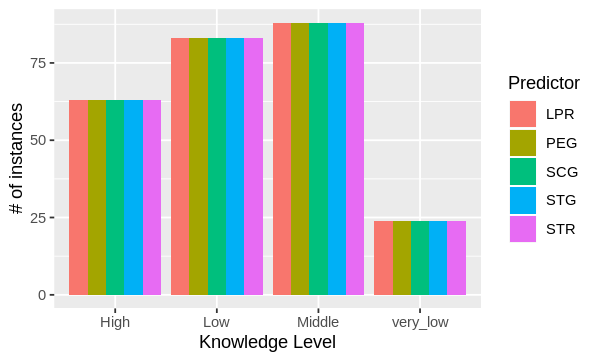

In [24]:
#testing_data <- know_data %>%
#        slice(training_rows)

#training_data <- know_data %>%
#        slice(-training_rows)

#head(testing_data)

#head(training_data)
options(repr.plot.width = 5, repr.plot.height = 3)
bar_data <- training_data %>%
        gather(key = predictor, value = value, -UNS) %>%
        group_by(UNS, predictor) %>%
        summarize(n = n())
head(bar_data)

bar_graph <- bar_data %>%
        ggplot(aes(x = UNS, y = n, fill = predictor)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x = "Knowledge Level", y = "# of instances", fill = "Predictor")
bar_graph

UNS,predictor,n
<fct>,<chr>,<dbl>
High,LPR,0.5012698
High,PEG,0.7725397
High,SCG,0.4231905
High,STG,0.4216508
High,STR,0.5016667
Low,LPR,0.4973494


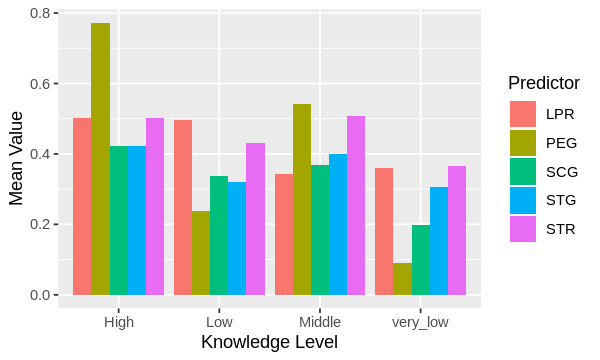

In [10]:
bar_data_2 <- training_data %>%
        gather(key = predictor, value = value, -UNS) %>%
        group_by(UNS, predictor) %>%
        summarize(n = mean(value))
head(bar_data_2)

bar_graph_2 <- bar_data_2 %>%
        ggplot(aes(x = UNS, y = n, fill = predictor)) +
        geom_bar(stat = "identity", position = "dodge") +
        labs(x = "Knowledge Level", y = "Mean Value", fill = "Predictor")
bar_graph_2

In [11]:
#url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff"
#skip_rows <- 36

#phishing_headers <- read_delim(url, delim = " ", n_max = skip_rows, skip_empty_rows = TRUE) %>%
#drop_na() %>%
#select(-`@relation`)
#header <- as.vector(phishing_headers$phishing)

#phishing_data <- read_csv(url, col_names = FALSE, skip = skip_rows)
#head(phishing_data)

In [12]:
#colnames(phishing_data) <- header
#head(phishing_data)


# Randomly take 75% of the data in the training set. 
# This will be proportional to the different number of fruit names in the dataset. ***IMPORTANT

#training_rows <- know_data %>%
#        select(UNS) %>%
#        unlist() %>%
#        createDataPartition(p = 0.75, list = FALSE)

#head(training_rows)dd